In [1]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Cargar los datos
books = pd.read_csv('../../Data/books_data.csv')
reviews = pd.read_csv('../../Data/Books_rating.csv')

In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [4]:
books.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [5]:
#Eliminar columnas que no se usaran en el analisis 
#No representan informacion relevante para el analisis
books.drop(['image','previewLink','infoLink'], axis=1, inplace=True)


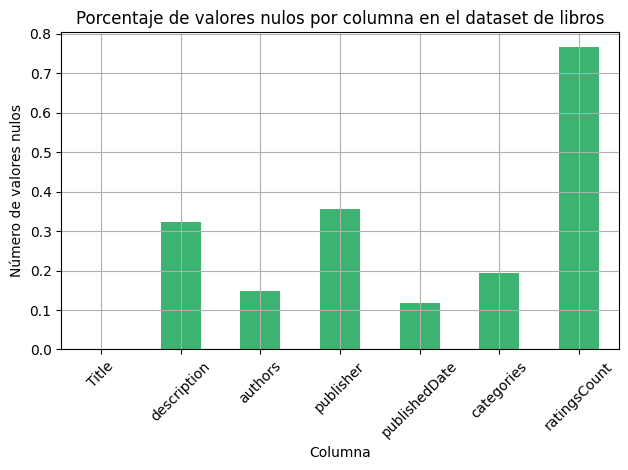

In [6]:
null_counts  = books.isnull().sum()
null_counts = null_counts/len(books)
null_counts.plot(kind='bar',color='mediumseagreen')
plt.title("Porcentaje de valores nulos por columna en el dataset de libros")
plt.xlabel("Columna")
plt.ylabel("Número de valores nulos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

In [7]:
num_libros = books['Title'].unique().__len__()
ratingCount_null = books.ratingsCount.isnull().sum()

print(f'Numero de libros: {num_libros}')
print(f'Numero de libros sin ratingCount: {ratingCount_null}')

#Porcentaje de libros sin ratingCount
porcentaje = (ratingCount_null/num_libros)*100
print(f'Porcentaje de libros sin ratingCount: {porcentaje:.2f}%')

print("En esta variable hay un gran numero de valores, nulos")


Numero de libros: 212404
Numero de libros sin ratingCount: 162652
Porcentaje de libros sin ratingCount: 76.58%
En esta variable hay un gran numero de valores, nulos


In [8]:
#Como queda la estructura del dataframe con la informacion de los libros
books.head()

,Title,description,authors,publisher,publishedDate,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],NaN,1996,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],NaN,2000,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],iUniverse,2005-02,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,2003-03-01,NaN,NaN


In [9]:
import re
#Eliminar los corchetes y las comillas de la columna authors

#Ejemplo
autor1 = books['authors'][0] # Un solo autor

#Eliminar los corchetes y las comillas
autor1 = re.sub(r'\[|\]|\'', '', autor1)
autor1


'Julie Strain'

In [10]:
def limpiar_columna_patron(columna, patron,df):
    """
    Funcion para limpiar una columna de un dataframe
    
    :param columna: str, nombre de la columna a limpiar
    :param patron: str, patron a eliminar
    :param df: dataframe, dataframe a limpiar

    :return: dataframe, dataframe con la columna limpia

    """
    df[columna] = df[columna].str.replace(patron, '', regex=True)
    return df

#Limpiar la columna authors
books = limpiar_columna_patron('authors', r'\[|\]|\'', books)

#Limpiar la columna categories
books = limpiar_columna_patron('categories', r'\[|\]|\'', books)


books.head()


,Title,description,authors,publisher,publishedDate,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,Julie Strain,NaN,1996,Comics & Graphic Novels,NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005-01-01,Biography & Autobiography,NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,David R. Ray,NaN,2000,Religion,NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,Veronica Haddon,iUniverse,2005-02,Fiction,NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,Edward Long,NaN,2003-03-01,NaN,NaN


In [11]:
#Solo conservar el año de publicacion en la columna publishedDate
books['publishedDate'] = books['publishedDate'].str.extract(r'(\d{4})')
books.head()

,Title,description,authors,publisher,publishedDate,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,Julie Strain,NaN,1996,Comics & Graphic Novels,NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005,Biography & Autobiography,NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,David R. Ray,NaN,2000,Religion,NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,Veronica Haddon,iUniverse,2005,Fiction,NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,Edward Long,NaN,2003,NaN,NaN


In [12]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [13]:
reviews.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [14]:
#Eliminar las columnas que no se utilizaran del dataframe reviews
reviews.drop(['Id','User_id','profileName','review/time'], axis=1, inplace=True)

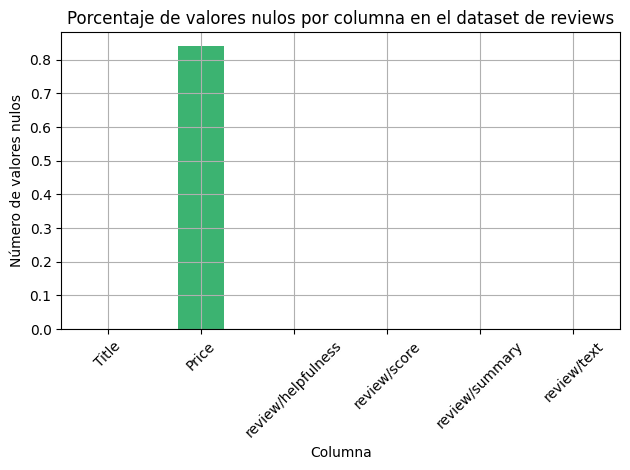

In [15]:
#Histograma de los valores nulos normalizado
null_counts  = reviews.isnull().sum()
null_counts = null_counts/len(reviews)
null_counts.plot(kind='bar',color='mediumseagreen')
plt.title("Porcentaje de valores nulos por columna en el dataset de reviews")
plt.xlabel("Columna")
plt.ylabel("Número de valores nulos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()


In [16]:
reviews.head()

,Title,Price,review/helpfulness,review/score,review/summary,review/text
0,Its Only Art If Its Well Hung!,NaN,7/7,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,Dr. Seuss: American Icon,NaN,10/10,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,NaN,10/11,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,NaN,7/7,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,NaN,3/3,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [17]:
#Verificar que se tenga informacion de todos los libros que tienen reseñas en el dataframe books
reviews['Title'].isin(books['Title']).value_counts()

Title
True    3000000
Name: count, dtype: int64

In [18]:
reviews['review/helpfulness'].describe()

count     3000000
unique      12084
top           0/0
freq       885732
Name: review/helpfulness, dtype: object

In [19]:
type(reviews['review/helpfulness'][0])

str

In [20]:
#Convertir la columna review/helpfulness a float

reviews['mergee'] = reviews['review/helpfulness'].str.split('/')
reviews['mergee'] = reviews['mergee'].apply(lambda x: float(x[0])/float(x[1]) if x[1] != '0' else 0)
reviews['review/helpfulness'] = round(reviews['mergee'],2)
reviews.drop('mergee', axis=1, inplace=True)


In [21]:
reviews.head()

,Title,Price,review/helpfulness,review/score,review/summary,review/text
0,Its Only Art If Its Well Hung!,NaN,1.00,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,Dr. Seuss: American Icon,NaN,1.00,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,NaN,0.91,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,NaN,1.00,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,NaN,1.00,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [22]:
#Verificar que se haya convertido correctamente la columna
reviews['review/helpfulness'].describe()

count    3.000000e+06
mean     4.924881e-01
std      4.310015e-01
min      0.000000e+00
25%      0.000000e+00
50%      5.000000e-01
75%      1.000000e+00
max      3.000000e+00
Name: review/helpfulness, dtype: float64

In [23]:
#Verificar si hay valores nulos en la columna review/helpfulness
reviews['review/helpfulness'].isnull().sum()

0

In [24]:
#Valores fuera de rango (0,1)
reviews[reviews['review/helpfulness'] > 1]

,Title,Price,review/helpfulness,review/score,review/summary,review/text
3733,You Can Have Your Cheese and Eat It Too!: A Co...,NaN,2.0,5.0,Great reading!,There are over 15 credible book endorsers for ...
186861,Automatic Wealth: The Six Steps to Financial I...,2.99,2.0,5.0,Strategic Wealth Creation Guide for Mid-Lifers,"Masterson knows wealth creation, having done i..."
806199,How to Practice : The Way to a Meaningful Life,NaN,2.0,5.0,"A better title is ""How To Live""",People of many backgrounds and faiths admire t...
1536353,Cold Mountain A Novel,NaN,3.0,2.0,A Bit Muddled,"The author states that he is ""copying"" Homer's..."
1772376,Bend in the Road,NaN,2.0,5.0,A Bend In The Road,"This is a tear jerker.Miles Ryan, deputy sheri..."
2667564,Cold Mountain,NaN,3.0,2.0,A Bit Muddled,"The author states that he is ""copying"" Homer's..."
2798716,A Bend in the Road,NaN,2.0,5.0,A Bend In The Road,"This is a tear jerker.Miles Ryan, deputy sheri..."


In [25]:
#Cantidad de valores fuera de rango
helpful_ind = reviews[reviews['review/helpfulness'] > 1].index
len(helpful_ind)

7

In [26]:
#Reemplazar los valores fuera de rango por 0
reviews.loc[helpful_ind, 'review/helpfulness'] = 0
reviews['review/helpfulness'].describe()

count    3.000000e+06
mean     4.924828e-01
std      4.309929e-01
min      0.000000e+00
25%      0.000000e+00
50%      5.000000e-01
75%      1.000000e+00
max      1.000000e+00
Name: review/helpfulness, dtype: float64

In [27]:
type(reviews['review/score'][0])

numpy.float64

In [28]:
#Unir los dataframes books y reviews
data = pd.merge(books, reviews, on='Title', how='inner')
data.head()

,Title,description,authors,publisher,publishedDate,categories,ratingsCount,Price,review/helpfulness,review/score,review/summary,review/text
0,Its Only Art If Its Well Hung!,NaN,Julie Strain,NaN,1996,Comics & Graphic Novels,NaN,NaN,1.00,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005,Biography & Autobiography,NaN,NaN,1.00,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005,Biography & Autobiography,NaN,NaN,0.91,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005,Biography & Autobiography,NaN,NaN,1.00,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005,Biography & Autobiography,NaN,NaN,1.00,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Title               object 
 1   description         object 
 2   authors             object 
 3   publisher           object 
 4   publishedDate       object 
 5   categories          object 
 6   ratingsCount        float64
 7   Price               float64
 8   review/helpfulness  float64
 9   review/score        float64
 10  review/summary      object 
 11  review/text         object 
dtypes: float64(4), object(8)
memory usage: 274.7+ MB


In [32]:
#Descartar variables dado el Enfoque del analisis

columas_descartar = ['description' , 'review/summary', 'review/text']
data.drop(columas_descartar, axis=1, inplace=True)

data.head()

,Title,authors,publisher,publishedDate,categories,ratingsCount,Price,review/helpfulness,review/score
0,Its Only Art If Its Well Hung!,Julie Strain,NaN,1996,Comics & Graphic Novels,NaN,NaN,1.00,4.0
1,Dr. Seuss: American Icon,Philip Nel,A&C Black,2005,Biography & Autobiography,NaN,NaN,1.00,5.0
2,Dr. Seuss: American Icon,Philip Nel,A&C Black,2005,Biography & Autobiography,NaN,NaN,0.91,5.0
3,Dr. Seuss: American Icon,Philip Nel,A&C Black,2005,Biography & Autobiography,NaN,NaN,1.00,4.0
4,Dr. Seuss: American Icon,Philip Nel,A&C Black,2005,Biography & Autobiography,NaN,NaN,1.00,4.0


In [33]:
data.to_csv('../../Data/data_merged.csv', index=False)